In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import truncnorm

In [2]:
def generate_timeseries(length, with_sin=False, sin_height_adjust=None):
    SIN_LENGTH_RATIO = 0.2
    timeseries = np.random.normal(0, 100, length)
    timeseries_info = (None, None, None) 

    if with_sin:
        sin_length = int(length*SIN_LENGTH_RATIO)
        t = np.linspace(0, 4*np.pi, sin_length)
        sine_wave = 30 * np.sin(t)
        sine_wave += sin_height_adjust
        patch_start = np.random.randint(0, length - len(t))
        patch_end = patch_start + len(t)
        timeseries[patch_start:patch_end] = sine_wave
        timeseries_info = (patch_start, patch_end, sin_height_adjust)

    return np.concatenate((timeseries, np.array(timeseries_info)))

In [3]:
def get_truncated_normal(len, mean=0.5, sd=.2, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(len)

In [4]:
def generate_dataset(ts_len, total, sin_n, sin_noise, randomize_sin_height=False):
    random_timeseries = [
        generate_timeseries(ts_len)
        for _ in range(total-sin_n)
    ]

    synthetic_error = get_truncated_normal(len=total-sin_n, mean=0.5, sd=0.1, low=0, upp=1)
    random_labels = np.c_[ synthetic_error, np.full((total-sin_n,), False) ]
    random_data = np.c_[ np.array(random_timeseries), random_labels]

    sin_height_normal = np.random.normal(0, 25, sin_n)
    
    sine_patch_timeseries = [
        generate_timeseries(ts_len, with_sin=True, sin_height_adjust=sin_height_normal[i]) 
        for i in range(sin_n)
    ]

    sine_synth_error = get_truncated_normal(len=sin_n, mean=0.9, sd=0.05, low=0, upp=1)
    sine_labels = np.c_[ sine_synth_error, np.full((sin_n,), True) ]
    sine_data = np.c_[ np.array(sine_patch_timeseries), sine_labels ] 

    full_data = np.r_[ random_data, sine_data ]
    columns = list(range(0, ts_len)) + ['sin_x0', 'sin_x1', 'sin_y', 'error', 'label']
    return pd.DataFrame(full_data, columns=columns)

In [5]:
def plot_random_series_helper(df):
    random_row = df.sample()
    datapoints = random_row.drop(columns=['label', 'error'])
    plt.plot(datapoints.values.flatten())
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [6]:
def plot_error_distributions(df):
    bins = np.linspace(0, 1, 50)
    plt.hist(df[df['label']==0]['error'], bins, alpha=0.5, label='sin=false')
    plt.hist(df[df['label']==1]['error'], bins, alpha=0.5, label='sin=true')
    plt.legend(loc='upper right')
    plt.show()

### FIXED-Y, NO NOISE
200 series, half with sin

In [7]:
df = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=False)

In [8]:
df[df.label==1].head(10)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
250,-90.238149,28.773148,41.369821,51.63801,57.679648,58.377944,53.603818,44.239764,32.016719,19.194102,...,138.583587,113.351586,88.634541,127.936202,-45.188807,1.0,31.0,28.773148,0.841195,1.0
251,228.277761,53.735075,119.856723,-151.850707,-14.410647,-68.870627,-54.031614,122.444804,108.397305,59.325759,...,91.634027,0.251469,68.511348,-60.947996,-301.680664,105.0,135.0,-35.309461,0.909216,1.0
252,146.55489,-132.055189,-28.03137,29.447502,48.076814,-139.974515,-62.335853,-8.471414,212.28953,-53.349479,...,-184.306799,-192.92573,84.340258,149.606411,0.081255,42.0,72.0,31.976918,0.805004,1.0
253,-126.091046,105.034284,-113.809256,41.184531,-55.131222,-40.619736,37.483466,20.764106,10.604114,-58.174686,...,-5.850135,27.44763,7.466801,107.635397,-139.876526,62.0,92.0,21.596924,0.894441,1.0
254,43.429706,181.15836,-94.110817,131.892388,150.00594,17.346672,64.137058,68.919317,-63.841383,7.169394,...,-48.810646,7.180487,73.360075,-183.623026,-44.971319,47.0,77.0,5.02703,0.841146,1.0
255,-92.295823,80.273418,-219.555034,-31.851547,-190.586034,-51.849598,-104.704522,24.03876,56.114263,-185.453267,...,106.895736,-17.210004,-21.781004,90.058914,-14.070608,90.0,120.0,4.385004,0.867774,1.0
256,172.952596,131.318422,-203.506611,136.431501,-98.499683,-9.249282,-100.982095,26.134275,-43.969429,-89.035209,...,-24.494287,18.680275,9.720147,11.840239,-285.86216,98.0,128.0,21.530597,0.922924,1.0
257,-76.275373,9.464901,2.812833,106.880379,-25.646805,-50.622265,26.733635,-140.905562,-44.943554,36.64147,...,148.393641,8.423574,-105.345116,26.022983,132.402466,10.0,40.0,21.462531,0.936016,1.0
258,30.33901,241.941164,19.635861,72.090311,37.532817,-125.277553,-20.287325,-108.209016,-59.348877,151.435897,...,71.505144,149.102515,30.895331,-35.60357,22.789373,27.0,57.0,9.303093,0.880607,1.0
259,-33.243582,86.777111,-28.399613,166.82564,-111.195386,-84.479213,-29.984294,-39.414308,123.741471,-178.906955,...,-35.678761,-50.564112,-84.077423,5.005141,11.513903,50.0,80.0,-33.534638,0.909419,1.0


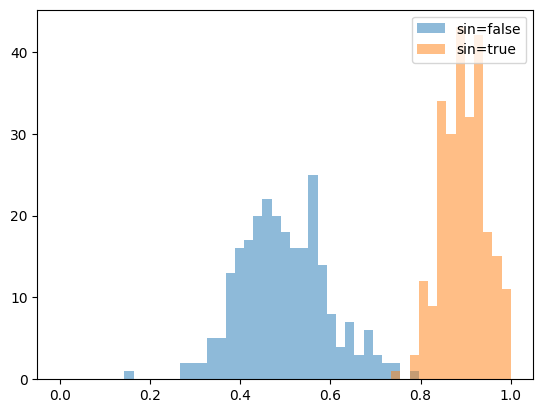

In [10]:
plot_error_distributions(df)

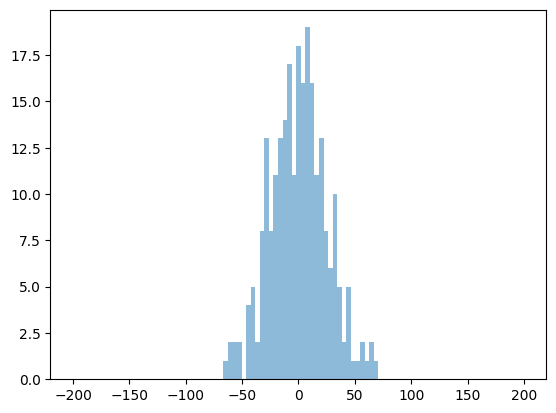

In [11]:
bins = np.linspace(-200, 200, 100)
_ = plt.hist(df[df['label']==1].sin_y, bins, alpha=0.5)

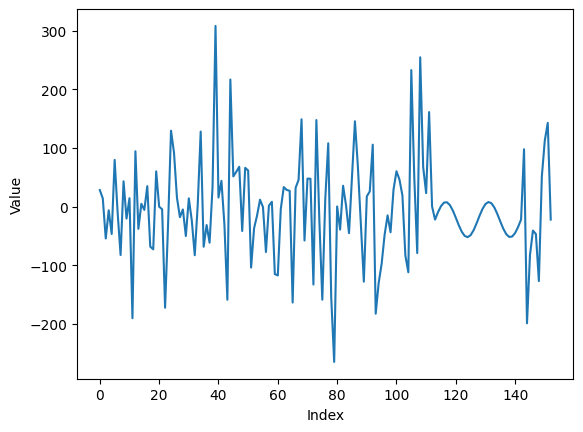

In [12]:
plot_random_series_helper(df=df[df['label']==1])

In [13]:
df.to_csv('./sin_synth/SIN_NORMAL_500_v2.csv', index=False)